In [98]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [99]:
df = pd.read_csv("C:/dataset/DSA_features.csv")

In [100]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [101]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [102]:
df["activity"].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

Text(0, 0.5, 'Count')

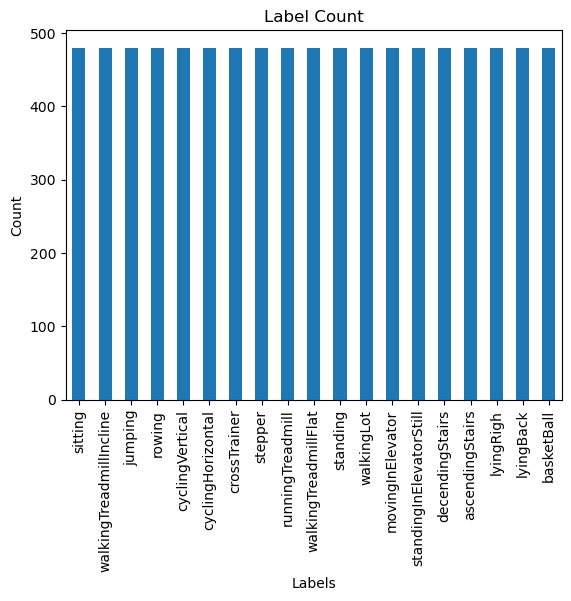

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [104]:
df_RA = df.filter(regex='RA_') 
df_LA = df.filter(regex='LA_') 

In [105]:
df_RA.insert(3, 'activity', df['activity'])

In [106]:
df_LA.insert(3, 'activity', df['activity'])

In [107]:
df_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,sitting,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,sitting,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,sitting,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,sitting,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,sitting,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.834459,40.1640,-15.3980,basketBall,140.063928,11.834861,0.486128,-3.441297,39.7590,-53.6520,...,-0.87575,0.210911,0.459250,-0.421162,-0.529403,0.653000,-0.879310,0.123917,0.352018,1.813520
9116,6.647402,43.9160,-22.3060,basketBall,65.655140,8.102786,0.067916,-5.140474,26.7770,-41.9160,...,-0.77618,0.143162,0.378368,-1.307983,-0.466066,0.659650,-0.835960,0.167255,0.408968,1.483683
9117,3.108810,40.2770,-10.9500,basketBall,84.701543,9.203344,1.178224,-4.881662,43.4020,-27.3490,...,0.16648,0.035696,0.188933,-0.736037,-0.286489,0.632420,-0.837640,0.109532,0.330956,0.502392
9118,5.141190,68.5920,-43.1120,basketBall,137.860050,11.741382,1.219670,-3.365847,23.6960,-34.5820,...,-0.85130,0.205452,0.453268,0.171353,-0.567578,0.264780,-0.854420,0.059971,0.244890,1.467799


In [108]:
df_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,sitting,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,sitting,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,sitting,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,sitting,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,sitting,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.690373,30.46300,-4.90150,basketBall,47.192912,6.869710,0.650080,2.187710,41.3410,-10.1410,...,-0.89670,0.177217,0.420971,1.232819,-0.120793,0.58641,-0.61373,0.077901,0.279107,0.611462
9116,6.477090,48.54700,-9.96820,basketBall,44.135927,6.643488,1.675812,5.845459,33.7910,-48.3200,...,-0.85305,0.158099,0.397617,1.560701,-0.133269,0.51707,-0.52776,0.058400,0.241661,0.574120
9117,6.309986,27.29900,-8.43140,basketBall,57.018917,7.551087,0.108921,6.342772,27.0570,-6.6706,...,-0.83512,0.126188,0.355229,1.598340,-0.567238,-0.14483,-0.82409,0.023408,0.152998,0.598665
9118,5.020496,30.16600,-20.25100,basketBall,67.001032,8.185416,0.157547,5.824265,27.6300,-19.8830,...,-0.87361,0.174494,0.417725,0.758435,0.211566,0.67931,-0.22328,0.060114,0.245181,0.316989


In [109]:
df_LA['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [110]:
df_RA['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [111]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])

C:\TempFolder\ipykernel_8904\3441972880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])
C:\TempFolder\ipykernel_8904\3441972880.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


In [112]:
print(df_LA['activity'].value_counts())
print(df_RA['activity'].value_counts())

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64
activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64


In [113]:
df_RA_Y=df_RA['activity']
df_LA_Y=df_LA['activity']

In [114]:
df_RA_X=df_RA.drop('activity',axis=1)
df_LA_X = df_LA.drop('activity',axis=1)

In [115]:
df_RA_X.head()

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,0.003779,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,0.001132,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,0.000488,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,0.001423,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,0.000471,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907


In [116]:
df_LA_X.head()

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,0.001178,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,0.001098,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,0.000684,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,0.001862,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,0.001061,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258


In [117]:
df_RA_Y

0       12
1       12
2       12
3       12
4       12
        ..
9115     1
9116     1
9117     1
9118     1
9119     1
Name: activity, Length: 9120, dtype: int32

In [118]:
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_X,df_RA_Y,test_size=0.25,random_state= 21)

In [119]:
X_train_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
3732,8.402410,10.35000,5.45250,0.281204,0.530286,-0.991978,5.112106,11.1490,2.9545,0.748592,...,-0.00341,0.002121,0.046060,-0.566008,0.355597,0.483510,-0.258470,0.018305,0.135297,-3.212013
5020,9.532217,14.62900,6.06970,4.247533,2.060954,0.454432,3.631005,8.3413,-2.7737,3.247349,...,-0.66255,0.181975,0.426585,0.348293,-1.286526,-0.774200,-2.296900,0.131366,0.362444,-0.508940
8229,8.219792,33.49500,-6.50680,49.533407,7.037997,1.015739,4.683870,23.0580,-5.0864,16.080696,...,-0.58706,0.056430,0.237550,-1.145917,0.412460,0.530540,0.200920,0.007756,0.088070,-0.730945
2820,9.144767,18.16600,5.21910,9.640896,3.104979,1.153792,3.636417,6.4448,1.6564,1.058794,...,-0.43122,0.012069,0.109861,0.125937,0.679460,0.767340,0.596710,0.002210,0.047010,-0.005872
3602,9.119976,9.70930,8.92790,0.030823,0.175566,1.764203,3.087552,3.4248,2.9508,0.006694,...,-0.31366,0.014993,0.122446,-0.078721,-0.225405,-0.095453,-0.315080,0.003775,0.061441,0.003469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844,-0.295277,0.54131,-1.12460,0.134815,0.367171,0.168238,9.045130,11.0590,7.6158,0.349431,...,-0.56940,0.000023,0.004790,1.188564,0.067791,0.115990,-0.056656,0.001902,0.043607,-1.259778
48,0.156108,0.20795,0.10541,0.000429,0.020704,0.270844,6.377611,6.4257,6.3384,0.000316,...,-0.60411,0.000006,0.002401,-0.193801,-0.179538,-0.148790,-0.210780,0.000042,0.006446,-0.868242
8964,0.325025,42.02500,-37.61600,69.866503,8.358618,0.742570,4.910320,21.7380,-46.4570,86.085136,...,-0.99422,0.348052,0.589959,0.994758,-0.126870,0.673420,-0.956150,0.095820,0.309549,0.538307
5944,6.178778,9.30760,2.12430,2.009351,1.417516,-0.102479,7.116314,12.0940,3.4552,2.816771,...,-1.07020,0.001003,0.031664,0.035494,0.531889,0.683390,0.356540,0.006822,0.082598,-0.501905


In [120]:
X_test_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
1395,0.458540,0.49007,0.4209,0.000181,0.013454,-0.312693,1.914851,1.9587,1.87140,0.000282,...,-0.088557,0.000081,0.008974,-0.201742,-0.741625,-0.708460,-0.765450,0.000065,0.008088,0.210508
6695,-0.868094,9.42820,-14.8040,50.941360,7.137322,-0.278551,6.945006,11.8100,0.14843,7.374953,...,-0.800800,0.005897,0.076794,0.283321,-0.910093,-0.608130,-1.114400,0.029423,0.171533,0.446641
5852,0.814327,5.14150,-4.0190,4.601564,2.145126,-0.045863,8.350449,10.9510,5.51270,0.836630,...,-0.432880,0.020994,0.144894,0.034935,0.270200,0.496800,0.065497,0.012901,0.113582,0.443566
4880,1.063845,2.87380,-1.2797,0.840972,0.917045,-0.210620,7.952791,11.1300,5.41440,0.696900,...,-0.671840,0.000643,0.025351,-0.343835,-0.798432,-0.755750,-0.848000,0.000309,0.017586,-0.321780
4943,7.285912,9.83300,5.5412,0.815210,0.902890,0.347336,4.173214,6.8687,-0.61047,3.178901,...,-0.299130,0.011116,0.105435,-0.408263,-0.266962,-0.163440,-0.442230,0.004753,0.068942,-0.587171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,9.359090,15.88600,4.1878,8.504481,2.916244,0.057790,0.995939,2.9841,-0.59147,0.628389,...,-0.353480,0.129509,0.359873,0.802153,-1.029253,-0.731280,-1.426000,0.038152,0.195326,-0.471091
7461,3.390022,4.20760,2.6147,0.122467,0.349953,-0.020421,0.793556,1.3624,0.36852,0.043081,...,-0.038275,0.000300,0.017311,-0.173358,-0.644823,-0.587720,-0.692100,0.000644,0.025375,0.172942
3651,9.046393,11.42200,6.0868,0.584645,0.764621,-0.079310,3.275322,5.7573,2.00510,0.432037,...,-0.294780,0.019734,0.140479,0.956047,-0.213945,0.041033,-0.342580,0.008463,0.091995,1.174144
4931,8.140468,14.45600,3.9492,1.144609,1.069864,1.648890,3.094353,6.8634,-4.34330,5.003882,...,-0.448550,0.005211,0.072189,-0.206549,-0.221971,-0.086098,-0.419700,0.006304,0.079397,-0.463216


In [121]:
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_X,df_LA_Y,test_size=0.25,random_state= 21)

In [122]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    x, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        x.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(x), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [123]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_RA = np.array(y_train_RA)
train_set_RA = np.c_[X_train_RA, y_train_array_RA]

y_test_array_RA = np.array(y_test_RA)
test_set_RA = np.c_[X_test_RA, y_test_array_RA]

In [124]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_LA = np.array(y_train_LA)
train_set_LA = np.c_[X_train_LA, y_train_array_LA]

y_test_array_LA = np.array(y_test_LA)
test_set_LA = np.c_[X_test_LA, y_test_array_LA]

In [125]:
n_step = 5

X_train_seq_RA, y_train_seq_RA = split_sequences(train_set_RA, n_step)
print(X_train_seq_RA.shape, y_train_seq_RA.shape)

X_test_seq_RA, y_test_seq_RA = split_sequences(test_set_RA, n_step)
print(X_test_seq_RA.shape, y_test_seq_RA.shape)

(6836, 5, 54) (6836,)
(2276, 5, 54) (2276,)


In [126]:
n_step = 5

X_train_seq_LA, y_train_seq_LA = split_sequences(train_set_LA, n_step)
print(X_train_seq_LA.shape, y_train_seq_LA.shape)

X_test_seq_LA, y_test_seq_LA = split_sequences(test_set_LA, n_step)
print(X_test_seq_LA.shape, y_test_seq_LA.shape)

(6836, 5, 54) (6836,)
(2276, 5, 54) (2276,)


In [127]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [128]:
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq_RA = to_categorical(y_train_seq_RA)
print(y_train_seq_RA.shape)

y_test_seq_RA = to_categorical(y_test_seq_RA)
print(y_test_seq_RA.shape)

(6836, 19)
(2276, 19)


In [129]:
# Convert output variables to categorical for CNN
y_train_seq_LA = to_categorical(y_train_seq_LA)
print(y_train_seq_LA.shape)

y_test_seq_LA = to_categorical(y_test_seq_LA)
print(y_test_seq_LA.shape)

(6836, 19)
(2276, 19)


In [130]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq_RA.shape[1], X_train_seq_RA.shape[2], y_train_seq_RA.shape[1]
print(n_timesteps, n_features, n_outputs)

5 54 19


In [276]:
model = Sequential()
model.add(LSTM(units=54, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64 ,activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

C:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [278]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 54)                  │          23,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 128)                 │           7,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,840 (151.72 KB)

 Trainable params: 38,840 (151.72 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
history = model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.1612 - loss: 2.6947 - val_accuracy: 0.3319 - val_loss: 2.0271
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4152 - loss: 1.7618 - val_accuracy: 0.4971 - val_loss: 1.5610
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5451 - loss: 1.3546 - val_accuracy: 0.5409 - val_loss: 1.4094
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6395 - loss: 1.0660 - val_accuracy: 0.5936 - val_loss: 1.2805
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7031 - loss: 0.9159 - val_accuracy: 0.6082 - val_loss: 1.2232
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7236 - loss: 0.8130 - val_accuracy: 0.6301 - val_loss: 1.1765
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7788 - loss: 0.6721 - val_accuracy: 0.6301 - val_loss: 1.1614
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8219 - loss: 0.5413 - val_accurac

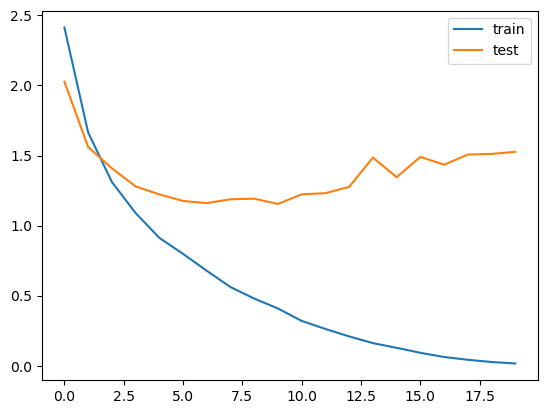

In [134]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [135]:
model.evaluate(X_train_seq_RA, y_train_seq_RA)

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0212


[0.16372911632061005, 0.9662083387374878]

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Confusion Matrix


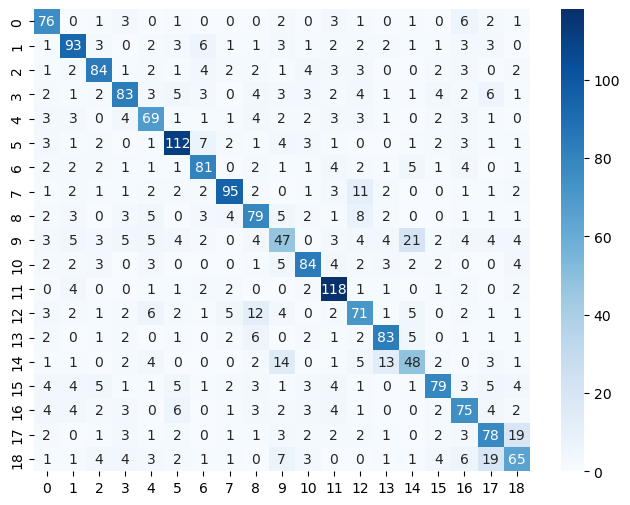

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq_RA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [137]:
base_loss,base_accuracy=model.evaluate(X_test_seq_RA, y_test_seq_RA)

model_file='C:/dataset/HAR/DSADS/RA_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6636 - loss: 1.5750


model saved at  C:/dataset/HAR/DSADS/RA_Model.h5
Accuracy >66.783834
Base Loss >1.56


In [138]:
model2 = Sequential()
model2.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

C:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [139]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 19)                  │           2,451 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,659 (440.07 KB)

 Trainable params: 112,659 (440.07 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
history2 = model2.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1614 - loss: 2.6789 - val_accuracy: 0.3918 - val_loss: 1.8198
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4792 - loss: 1.6106 - val_accuracy: 0.4825 - val_loss: 1.5460
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5591 - loss: 1.2851 - val_accuracy: 0.5643 - val_loss: 1.3531
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6529 - loss: 1.0584 - val_accuracy: 0.6038 - val_loss: 1.2715
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6981 - loss: 0.8983 - val_accuracy: 0.6477 - val_loss: 1.0882
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7597 - loss: 0.7243 - val_accuracy: 0.6360 - val_loss: 1.1120
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7857 - loss: 0.6346 - val_accuracy: 0.6550 - val_loss: 1.0962
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8307 - loss: 0.5218 - val_accurac

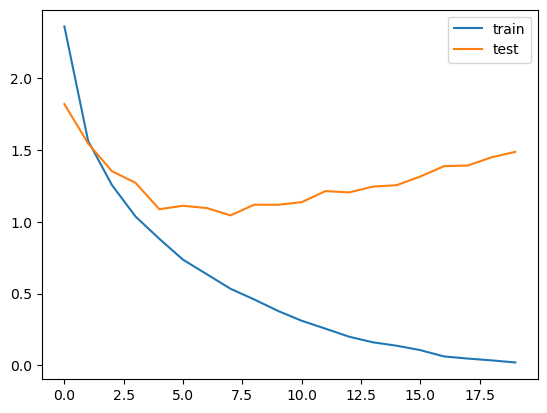

In [141]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [142]:
model2.evaluate(X_train_seq_LA, y_train_seq_LA)

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9965 - loss: 0.0270


[0.16477365791797638, 0.9666471481323242]

In [143]:
model2.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6862 - loss: 1.5357


[1.5079787969589233, 0.6858523488044739]

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Confusion Matrix


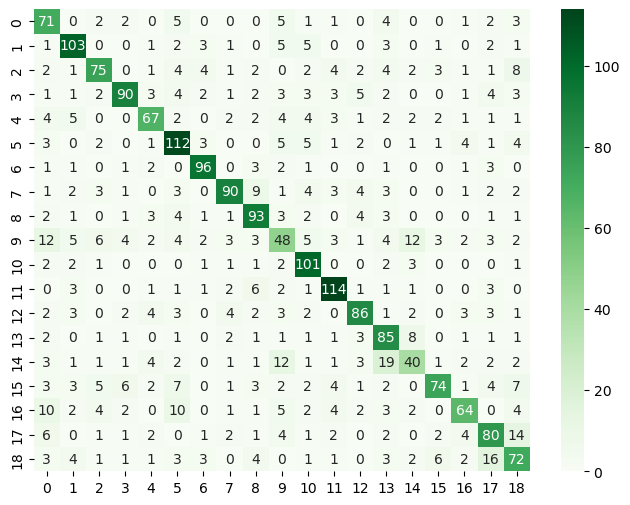

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_LA, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_LA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

In [145]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [146]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6636 - loss: 1.5750


[1.555271029472351, 0.6678383350372314]

In [147]:
base_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2054 - loss: 5.8026


[5.949766635894775, 0.2029877007007599]

In [148]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [149]:
base_model.trainable = False

In [150]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           2,451 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,659 (440.07 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 112,659 (440.07 KB)

In [286]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential()  # 새로운 모델에 해당 레이어들만 추가
    for i, layer in enumerate(model_layers):
        if i ==0:
            new_model.add(layers.InputLayer(input_shape=model.input_shape[1:]))
        new_model.add(layer)                          
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(19, activation='softmax')) 
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

C:\anaconda\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 19)                  │           4,883 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148,115 (578.57 KB)

 Trainable params: 37,907 (148.07 KB)

 Non-trainable params: 110,208 (430.50 KB)

In [288]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm, built=True>",lstm,False
1,"<Dense name=dense, built=True>",dense,False
2,"<Dense name=dense_66, built=True>",dense_66,True
3,"<Dense name=dense_67, built=True>",dense_67,True


In [290]:

history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6939 - loss: 1.2002 - val_accuracy: 0.6637 - val_loss: 1.2502
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9945 - loss: 0.0756 - val_accuracy: 0.6579 - val_loss: 1.4315
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9983 - loss: 0.0324 - val_accuracy: 0.6623 - val_loss: 1.5450
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0176 - val_accuracy: 0.6623 - val_loss: 1.6420
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 0.6579 - val_loss: 1.7699
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.6564 - val_loss: 1.8309
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.6579 - val_loss: 1.9272
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 19)                  │           4,883 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,931 (874.73 KB)

 Trainable params: 37,907 (148.07 KB)

 Non-trainable params: 110,208 (430.50 KB)

 Optimizer params: 75,816 (296.16 KB)

In [292]:

new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6673 - loss: 2.6732


[2.6324143409729004, 0.6704745292663574]

In [294]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [296]:

import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm, built=True>",lstm,True
1,"<Dense name=dense, built=True>",dense,True
2,"<Dense name=dense_66, built=True>",dense_66,True
3,"<Dense name=dense_67, built=True>",dense_67,True


In [298]:

history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9633 - loss: 0.1096 - val_accuracy: 0.6184 - val_loss: 2.6211
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9729 - loss: 0.0761 - val_accuracy: 0.6272 - val_loss: 2.6451
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9758 - loss: 0.0732 - val_accuracy: 0.6096 - val_loss: 2.6607
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9711 - loss: 0.0798 - val_accuracy: 0.6257 - val_loss: 2.6431
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9644 - loss: 0.1104 - val_accuracy: 0.6213 - val_loss: 2.4283
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9646 - loss: 0.1021 - val_accuracy: 0.6491 - val_loss: 2.3456
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9888 - loss: 0.0324 - val_accuracy: 0.6535 - val_loss: 2.3664
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9913 - loss: 0.0312 - val_accu

In [299]:

new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6743 - loss: 2.7025


[2.709167242050171, 0.6704745292663574]

In [302]:
new_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2135 - loss: 9.5824


[9.866035461425781, 0.2122144103050232]